In [1]:
import pandas as pd

df=pd.read_csv("/content/customer_churn_dataset-testing-master.csv")                   # Data Acquisition

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()                                             #Data Preprocessing

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df.drop(columns=["CustomerID","Churn"])
y=df.iloc[:,-1]

print(x)
print('\n')
print(y)


       Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22       0      25               14              4             27   
1       41       0      28               28              7             13   
2       47       1      27               10              2             29   
3       35       1       9               12              5             17   
4       53       0      58               24              9              2   
...    ...     ...     ...              ...            ...            ...   
64369   45       0      33               12              6             21   
64370   37       1       6                1              5             22   
64371   25       1      39               14              8             30   
64372   50       0      18               19              7             22   
64373   52       0      45               15              9             25   

       Subscription Type  Contract Length  Total Spend  Last Interaction  


In [5]:
from sklearn.metrics import r2_score,recall_score,precision_score,accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=60)           #Data splitting


scaler = StandardScaler()                                     # Data Pre processing and enginering
non_categorical = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
x_train[non_categorical]=scaler.fit_transform(x_train[non_categorical])
x_test[non_categorical]=scaler.transform(x_test[non_categorical])



Accuracy is:  98.31456310679611
Recall is:  98.20782637290365
Precision is:  98.22397631968425


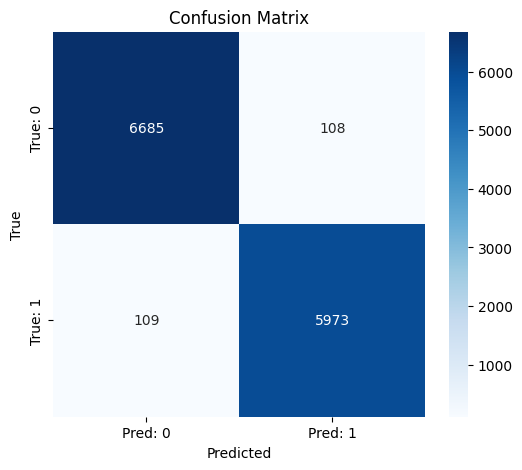

In [6]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1 , random_state=42)          #Model Selection

model.fit(x_train,y_train)                                               # Model Training
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)                                      # Model Evaluation
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print("Accuracy is: ",accuracy*100)
print("Recall is: ",recall*100)
print("Precision is: ",precision*100)

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [7]:
#Deployment
input={
    "Age":[37],
    "Gender":[1],
    "Tenure":[12],
    "Usage Frequency":[20],
    "Support Calls":[2],
    "Payment Delay":[18],
    "Subscription Type":[2],
    "Contract Length":[1],
    "Total Spend":[520],
    "Last Interaction":[16]
}
new_data=pd.DataFrame(input)
new_data[non_categorical]=scaler.transform(new_data[non_categorical])
output=model.predict(new_data)
print(output)

[0]


In [9]:
import joblib
joblib.dump(model, 'Random_Forest_model.pkl')
print("Model saved successfully.")


Model saved successfully.
